# Regression problem - The aim of the model is to predict medical insurance prices

# Dataset source: https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.model_selection import train_test_split

# <span style="color: #1BB5B7;font-size: 25pt">1. EDA - brief analysis of the dataset </span>

In [3]:
df = pd.read_csv('medical_insurance.csv')
df['sex'] = df['sex'].replace({'male': 1, 'female': 2})
df['smoker'] = df['smoker'].replace({'yes': 0, 'no': 1})
df['region'] = df['region'].replace({'southwest': 0, 'northwest': 1, 'southeast' : 2, 'northeast': 3})
print(df.shape)
df

(2772, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,2,45.320,1,1,2,8569.86180
2768,21,2,34.600,0,1,0,2020.17700
2769,19,1,26.030,1,0,1,16450.89470
2770,23,1,18.715,0,1,1,21595.38229


### There are no missing values in the dataset

In [4]:
missing_values = df.isna().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Number of unique values for each feature 

In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Basic statistics

In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,1.492785,30.701349,1.101732,0.796537,1.504329,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.103936,12151.768945
min,18.000000,1.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,1.000000,26.220000,0.000000,1.000000,1.000000,4687.797000
50%,39.000000,1.000000,30.447500,1.000000,1.000000,2.000000,9333.014350
75%,51.000000,2.000000,34.770000,2.000000,1.000000,2.000000,16577.779500
max,64.000000,2.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Correlation between features and insurance charge

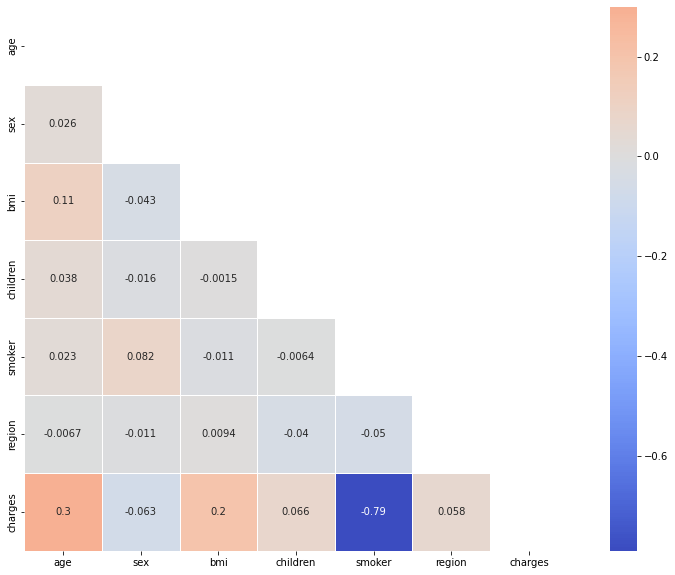

In [7]:
plt.figure(figsize=(15,10))
corr = df.corr()
heat_map = sns.heatmap( corr,
    center=0, 
    cmap="coolwarm", 
    square=True,
    annot=True,
    mask=np.triu(df.corr()),linewidth=1, linecolor='white' )

### Boxplot for each feature

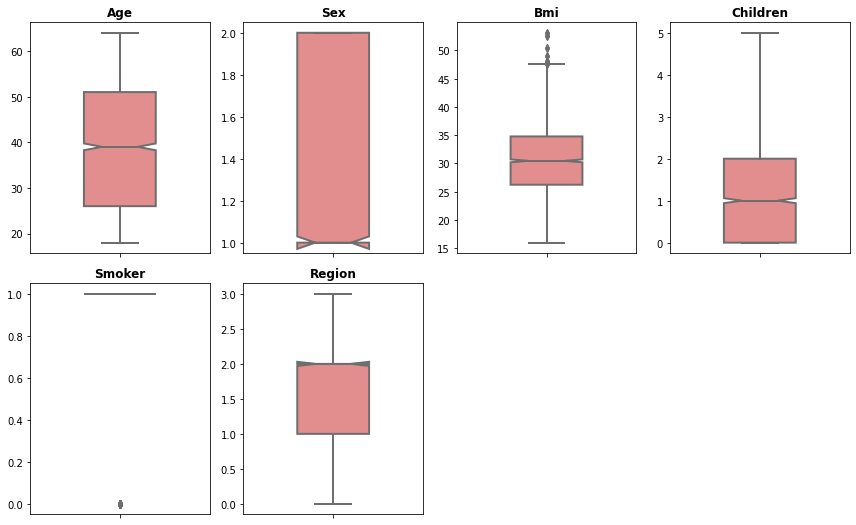

In [8]:
index = 1
plt.figure(figsize=(12,40))
for i in range(1, len(df.columns)):
    plt.subplot(11, 4, index)
    sns.boxplot(data=df,y=df.columns[i-1], 
                linewidth=2, palette=["lightcoral", "lightgreen"],width=0.4,notch=True)
    plt.title(df.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel('', fontsize=12, weight='bold')
    plt.xlabel('')
    index += 1
    plt.tight_layout()
    
plt.show()

### Distribution of values for each characteristic 

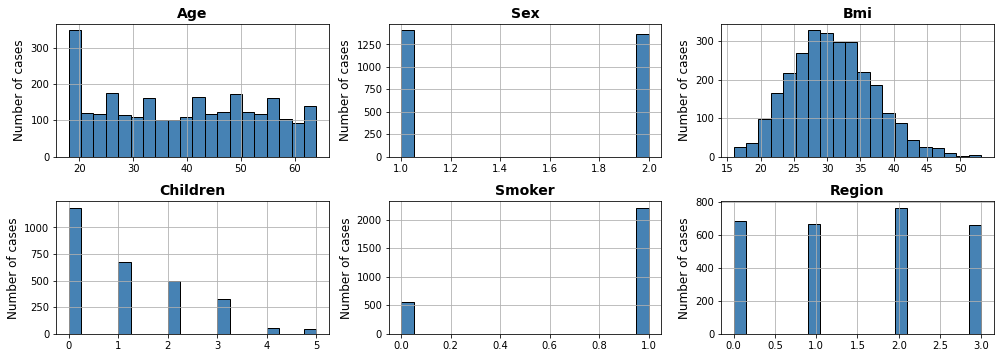

In [9]:
index = 1
plt.figure(figsize=(14,27))
for i in range(1, len(df.columns)):
    plt.subplot(11, 3, index)
    plt.hist(x=df[df.columns[i-1]], color='steelblue', bins=20, edgecolor='black')
    plt.title(df.columns[i-1].title(), fontsize=14, weight='bold')
    plt.ylabel(ylabel='Number of cases', fontsize=12)
    plt.grid()
    index += 1
    plt.tight_layout()
    
plt.show()

# <span style="color: #1BB5B7;font-size: 25pt">2. Neural network with Keras - Medical Insurance Cost Prediction (regression problem)</span>

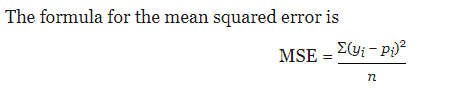
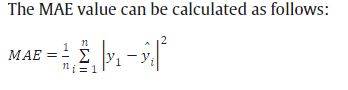

Epoch 1/180
119/119 [==============================] - 3s 8ms/step - loss: 322771520.0000 - mae: 13200.9727 - val_loss: 333913664.0000 - val_mae: 13538.3838
Epoch 2/180
119/119 [==============================] - 1s 6ms/step - loss: 320020192.0000 - mae: 13102.2646 - val_loss: 328374848.0000 - val_mae: 13346.3486
Epoch 3/180
119/119 [==============================] - 1s 5ms/step - loss: 309194944.0000 - mae: 12704.0508 - val_loss: 309709504.0000 - val_mae: 12676.9766
Epoch 4/180
119/119 [==============================] - 1s 5ms/step - loss: 281505856.0000 - mae: 11622.5508 - val_loss: 270000576.0000 - val_mae: 11138.1045
Epoch 5/180
119/119 [==============================] - 1s 5ms/step - loss: 233863328.0000 - mae: 9763.2314 - val_loss: 213213072.0000 - val_mae: 9016.4756
Epoch 6/180
119/119 [==============================] - 1s 6ms/step - loss: 180243200.0000 - mae: 7903.5479 - val_loss: 163810848.0000 - val_mae: 7997.6582
Epoch 7/180
119/119 [==============================] - 1s 6ms/

119/119 [==============================] - 0s 4ms/step - loss: 125503304.0000 - mae: 8988.7412 - val_loss: 126294664.0000 - val_mae: 9098.0371
Epoch 54/180
119/119 [==============================] - 0s 4ms/step - loss: 125346760.0000 - mae: 8950.5498 - val_loss: 126062424.0000 - val_mae: 9092.1641
Epoch 55/180
119/119 [==============================] - 0s 4ms/step - loss: 125141872.0000 - mae: 8918.1797 - val_loss: 125836576.0000 - val_mae: 9083.1084
Epoch 56/180
119/119 [==============================] - 1s 5ms/step - loss: 124835648.0000 - mae: 9024.4062 - val_loss: 125616272.0000 - val_mae: 9067.2578
Epoch 57/180
119/119 [==============================] - 0s 4ms/step - loss: 124621160.0000 - mae: 8882.7549 - val_loss: 125314208.0000 - val_mae: 9083.7744
Epoch 58/180
119/119 [==============================] - 1s 5ms/step - loss: 124369312.0000 - mae: 8950.1670 - val_loss: 125038904.0000 - val_mae: 9089.1729
Epoch 59/180
119/119 [==============================] - 1s 4ms/step - loss: 1

119/119 [==============================] - 1s 6ms/step - loss: 86705544.0000 - mae: 7222.9023 - val_loss: 87526136.0000 - val_mae: 7089.5923
Epoch 106/180
119/119 [==============================] - 1s 5ms/step - loss: 84525168.0000 - mae: 6993.7124 - val_loss: 84676536.0000 - val_mae: 7151.4790
Epoch 107/180
119/119 [==============================] - 1s 5ms/step - loss: 82206120.0000 - mae: 6954.3120 - val_loss: 82570536.0000 - val_mae: 6967.3765
Epoch 108/180
119/119 [==============================] - 1s 5ms/step - loss: 79947960.0000 - mae: 6758.3931 - val_loss: 80204912.0000 - val_mae: 6896.9038
Epoch 109/180
119/119 [==============================] - 1s 6ms/step - loss: 77575632.0000 - mae: 6622.2642 - val_loss: 78003632.0000 - val_mae: 6696.2007
Epoch 110/180
119/119 [==============================] - 1s 5ms/step - loss: 75133184.0000 - mae: 6472.1011 - val_loss: 75761136.0000 - val_mae: 6541.8521
Epoch 111/180
119/119 [==============================] - 1s 5ms/step - loss: 7298650

Epoch 158/180
119/119 [==============================] - 1s 4ms/step - loss: 38281464.0000 - mae: 4467.9775 - val_loss: 43117380.0000 - val_mae: 4988.2944
Epoch 159/180
119/119 [==============================] - 0s 4ms/step - loss: 38251916.0000 - mae: 4473.1699 - val_loss: 43063976.0000 - val_mae: 4959.8628
Epoch 160/180
119/119 [==============================] - 0s 4ms/step - loss: 38201000.0000 - mae: 4478.3745 - val_loss: 43067716.0000 - val_mae: 4954.6406
Epoch 161/180
119/119 [==============================] - 0s 4ms/step - loss: 38200196.0000 - mae: 4493.9370 - val_loss: 43196796.0000 - val_mae: 4940.8066
Epoch 162/180
119/119 [==============================] - 0s 4ms/step - loss: 38143392.0000 - mae: 4457.5889 - val_loss: 43094016.0000 - val_mae: 4994.4160
Epoch 163/180
119/119 [==============================] - 0s 4ms/step - loss: 38093552.0000 - mae: 4471.9434 - val_loss: 42915564.0000 - val_mae: 4966.0015
Epoch 164/180
119/119 [==============================] - 0s 4ms/step -

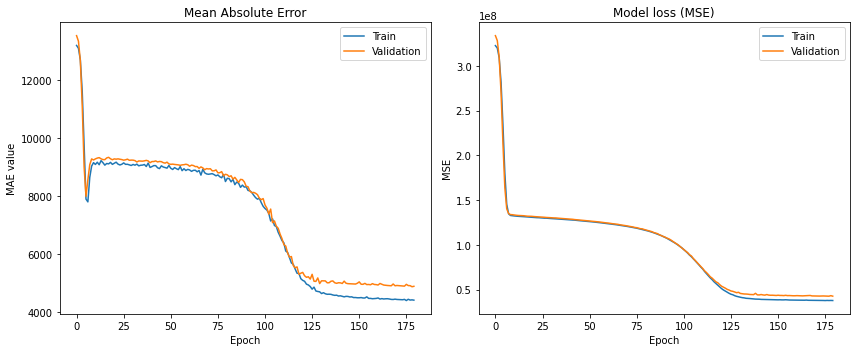

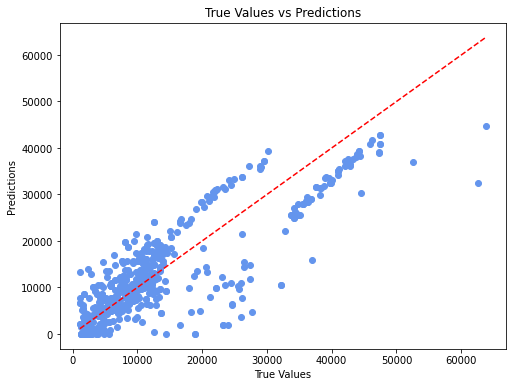

18/18 [==============================] - 0s 4ms/step - loss: 39920372.0000 - mae: 4577.2183
Mean Absolute Error on test set: 4577.21826171875
70/70 [==============================] - 0s 3ms/step - loss: 38559600.0000 - mae: 4503.3208
Mean Absolute Error on train set: 4503.32080078125


In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

model = Sequential()
model.add(Dense(2**4, input_shape=(6,), activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) 

history = model.fit(X_train, y_train, epochs=180, batch_size=15, validation_split=0.2)

def test_model(model, x_test, y_test, history, X_train, y_train):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['mae']) 
    plt.plot(history.history['val_mae']) 
    plt.title('Mean Absolute Error') 
    plt.ylabel('MAE value') 
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss (MSE)') 
    plt.ylabel('MSE')  
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()
    
    y_pred = model.predict(x_test,verbose=0)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='cornflowerblue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True Values vs Predictions')
    plt.show()

    loss, mae = model.evaluate(x_test, y_test)
    print('Mean Absolute Error on test set:', mae)
    
    loss, mae = model.evaluate(X_train, y_train)
    print('Mean Absolute Error on train set:', mae)

test_model(model, X_test, y_test, history, X_train, y_train)


# <span style="color: #2F4F4F;font-size: 25pt">a) Investigating the impact of the optimizer on the results</span>


Optimizer - adam


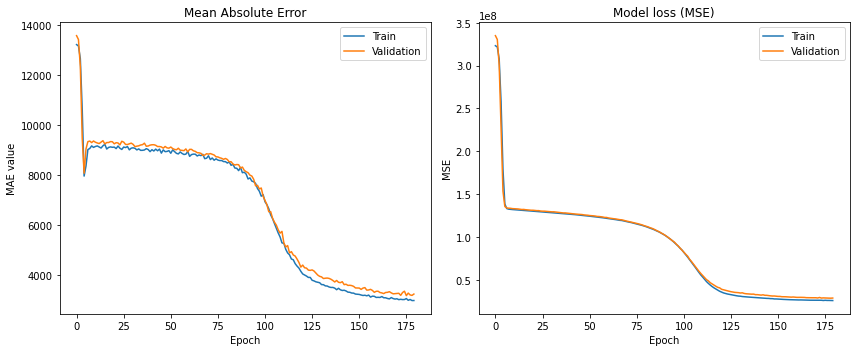

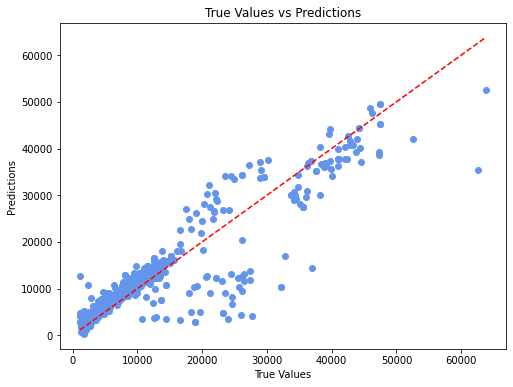

18/18 [==============================] - 0s 3ms/step - loss: 25205100.0000 - mae: 3046.2368
Mean Absolute Error on test set: 3046.23681640625
70/70 [==============================] - 0s 3ms/step - loss: 26309668.0000 - mae: 3087.8374
Mean Absolute Error on train set: 3087.83740234375
........................................................................

Optimizer - rmsprop


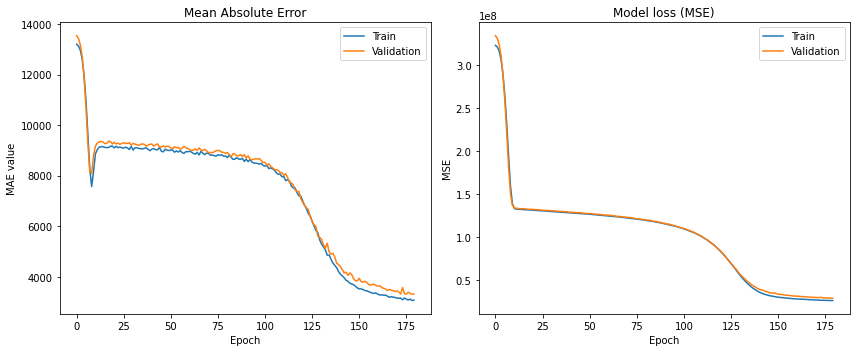

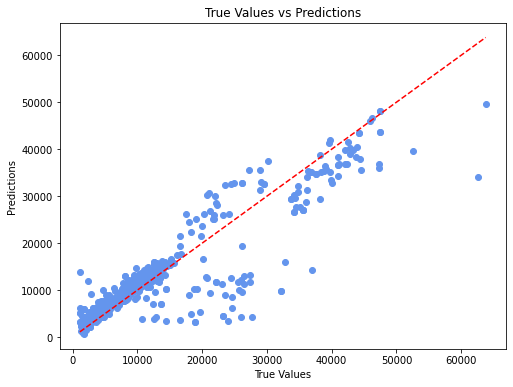

18/18 [==============================] - 0s 4ms/step - loss: 26115716.0000 - mae: 3091.5659
Mean Absolute Error on test set: 3091.56591796875
70/70 [==============================] - 0s 3ms/step - loss: 26834648.0000 - mae: 3128.1304
Mean Absolute Error on train set: 3128.13037109375
........................................................................

Optimizer - adagrad


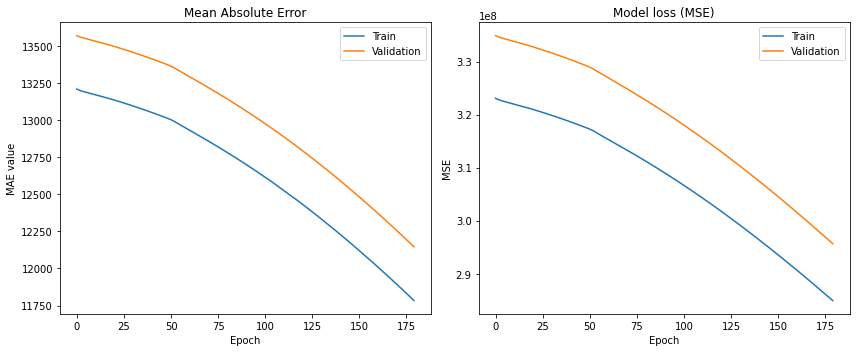

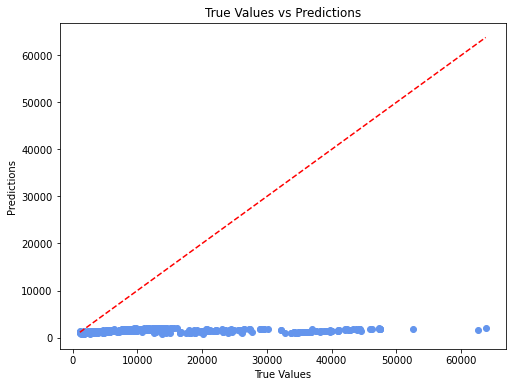

18/18 [==============================] - 0s 4ms/step - loss: 276175296.0000 - mae: 11669.9736
Mean Absolute Error on test set: 11669.9736328125
70/70 [==============================] - 0s 3ms/step - loss: 286964032.0000 - mae: 11851.3486
Mean Absolute Error on train set: 11851.3486328125
........................................................................

Optimizer - adamax


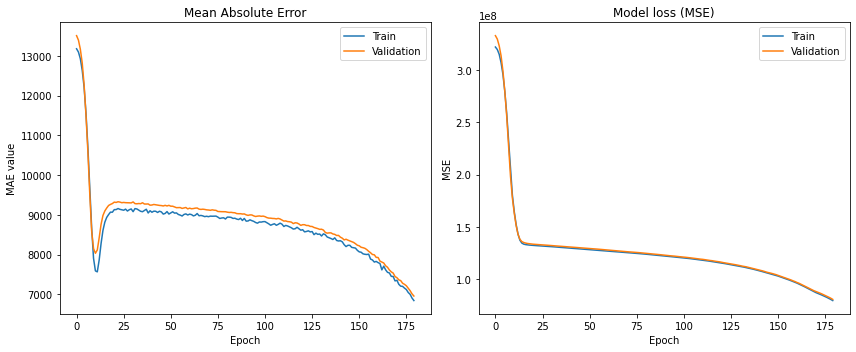

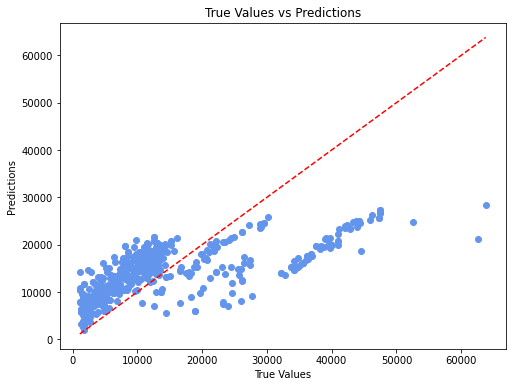

18/18 [==============================] - 0s 4ms/step - loss: 80624624.0000 - mae: 7057.5029
Mean Absolute Error on test set: 7057.5029296875
70/70 [==============================] - 0s 3ms/step - loss: 79098496.0000 - mae: 6848.0542
Mean Absolute Error on train set: 6848.05419921875
........................................................................

  optimizer  Accuracy-train  Accuracy-test
0      adam     3087.837402    3046.236816
1   rmsprop     3128.130371    3091.565918
2   adagrad    11851.348633   11669.973633
3    adamax     6848.054199    7057.502930


In [11]:
optimizers = ['adam', 'rmsprop', 'adagrad', 'adamax']
MAE_test_opt = []
MAE_train_opt = []

for opt in optimizers:
    model = Sequential()
    model.add(Dense(2**4, input_shape=(6,), activation='relu'))
    model.add(Dense(2**3, activation='relu'))
    model.add(Dense(2**2, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae']) 
    
    
    history = model.fit(X_train, y_train, epochs=180, batch_size=15, validation_split=0.2, verbose=0)    
    print("Optimizer - {}".format(opt))
    test_model(model, X_test, y_test, history, X_train, y_train)
    print('........................................................................')
    print('')
    MAE_test_opt.append(model.evaluate(X_test, y_test, verbose=0)[1])
    MAE_train_opt.append(model.evaluate(X_train, y_train, verbose=0)[1])

df_opt = {
    'optimizer': optimizers,
    'Accuracy-train': MAE_train_opt,
    'Accuracy-test': MAE_test_opt
}

results_opt = pd.DataFrame(df_opt)
print(results_opt)

# <span style="color: #2F4F4F;font-size: 25pt">b) Investigating impact of neurons number on the results </span>


In [73]:
Neurons =['powers of 2','powers of 10','32,64,32,1','64,32,64,1','2^8,2^4,2^2,1']
MAE_test_neurons = []
MAE_train_neurons = []

In [74]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

## <span style="color: #8B0000;">Number of neurons - powers of 2</span>

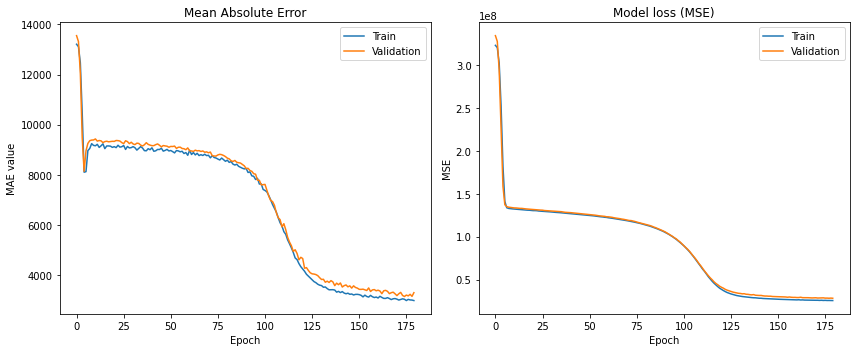

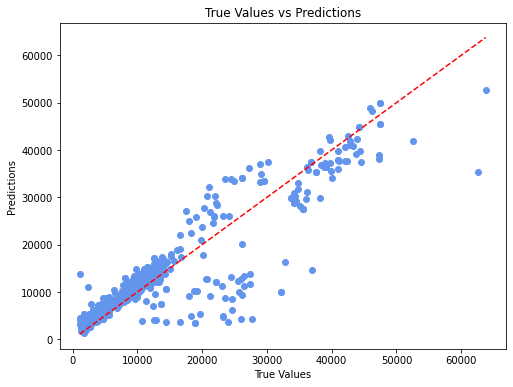

18/18 [==============================] - 0s 2ms/step - loss: 25221172.0000 - mae: 3085.2993
Mean Absolute Error on test set: 3085.29931640625
70/70 [==============================] - 0s 2ms/step - loss: 26014242.0000 - mae: 3126.5034
Mean Absolute Error on train set: 3126.50341796875


In [75]:
model = Sequential()
model.add(Dense(2**4, input_shape=(6,), activation='relu'))
model.add(Dense(2**3, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) 

history = model.fit(X_train, y_train, epochs=180, batch_size=15, validation_split=0.2, verbose=0)
test_model(model, X_test, y_test, history, X_train, y_train)
MAE_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
MAE_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of neurons - powers of 10</span>

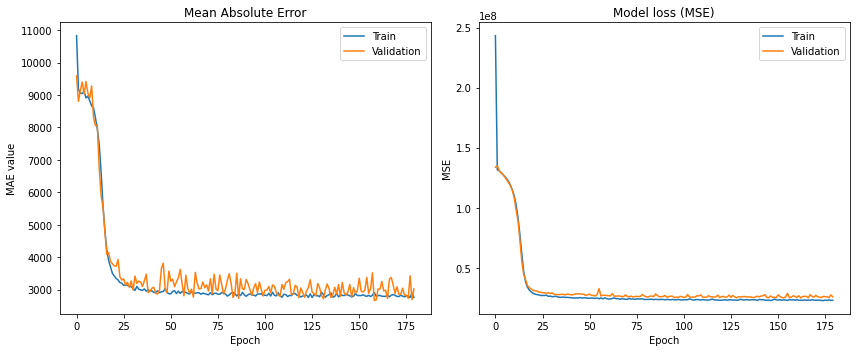

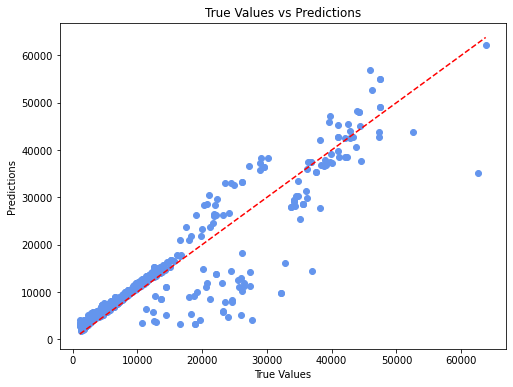

18/18 [==============================] - 0s 3ms/step - loss: 23589236.0000 - mae: 2886.7334
Mean Absolute Error on test set: 2886.7333984375
70/70 [==============================] - 0s 3ms/step - loss: 23535622.0000 - mae: 2884.2854
Mean Absolute Error on train set: 2884.285400390625


In [76]:
model = Sequential()
model.add(Dense(1000, input_shape=(6,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) 

history = model.fit(X_train, y_train, epochs=180, batch_size=15, validation_split=0.2, verbose=0)
test_model(model, X_test, y_test, history, X_train, y_train)
MAE_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
MAE_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of neurons - 32, 64, 32, 1</span>


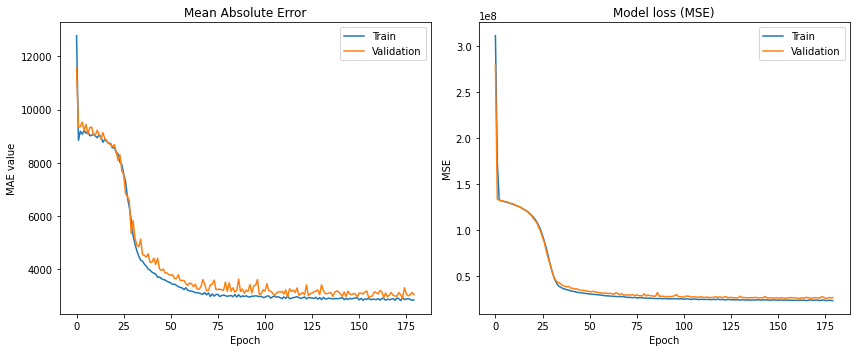

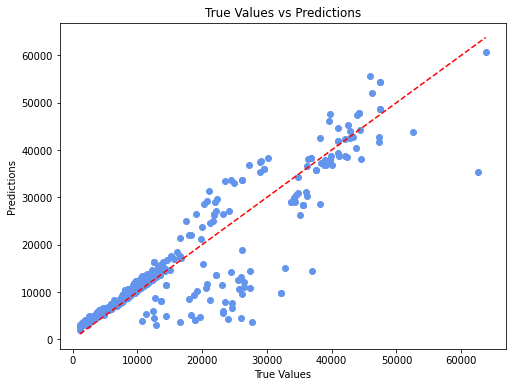

18/18 [==============================] - 0s 3ms/step - loss: 23717716.0000 - mae: 2843.7964
Mean Absolute Error on test set: 2843.79638671875
70/70 [==============================] - 0s 3ms/step - loss: 23988788.0000 - mae: 2902.8821
Mean Absolute Error on train set: 2902.882080078125


In [77]:
model = Sequential()
model.add(Dense(31, input_shape=(6,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) 

history = model.fit(X_train, y_train, epochs=180, batch_size=15, validation_split=0.2, verbose=0)
test_model(model, X_test, y_test, history, X_train, y_train)
MAE_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
MAE_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of neurons - 64, 32, 64, 1</span>


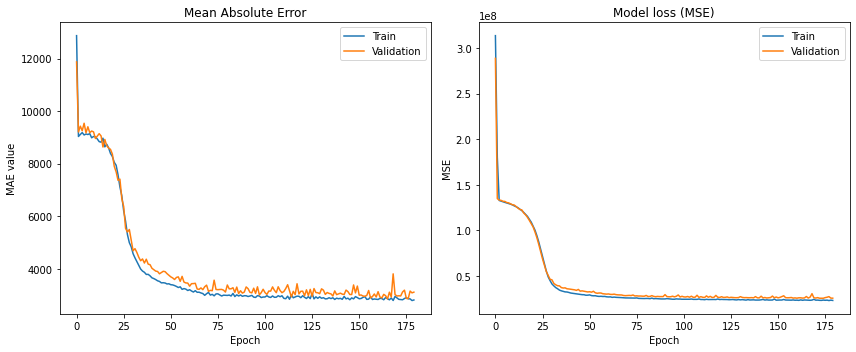

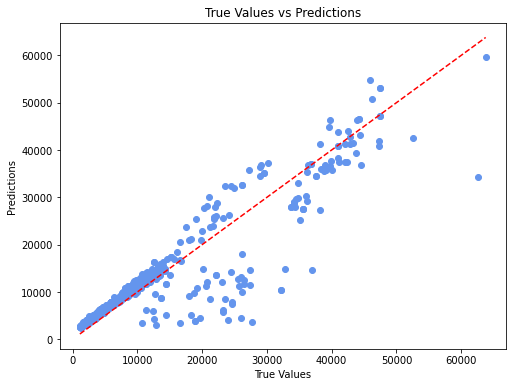

18/18 [==============================] - 0s 9ms/step - loss: 23508164.0000 - mae: 2966.1526
Mean Absolute Error on test set: 2966.152587890625
70/70 [==============================] - 0s 4ms/step - loss: 23384330.0000 - mae: 2995.2590
Mean Absolute Error on train set: 2995.259033203125


In [78]:
model = Sequential()
model.add(Dense(64, input_shape=(6,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) 

history = model.fit(X_train, y_train, epochs=180, batch_size=15, validation_split=0.2, verbose=0)
test_model(model, X_test, y_test, history, X_train, y_train)
MAE_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
MAE_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

## <span style="color: #8B0000;">Number of neurons - 2^8, 2^4, 2^2, 1</span>

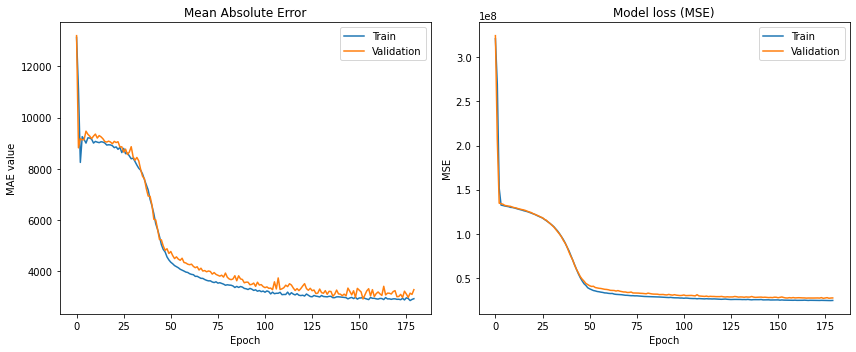

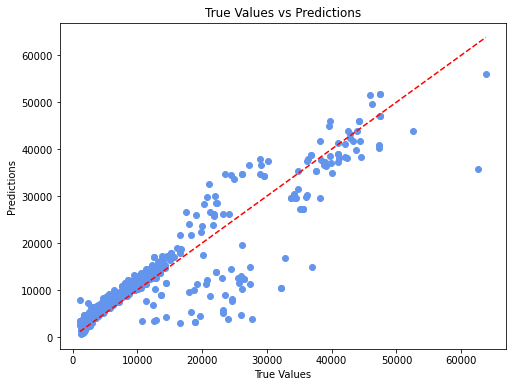

18/18 [==============================] - 0s 2ms/step - loss: 24069648.0000 - mae: 3026.0508
Mean Absolute Error on test set: 3026.05078125
70/70 [==============================] - 0s 2ms/step - loss: 25128444.0000 - mae: 3107.2102
Mean Absolute Error on train set: 3107.210205078125


In [79]:
model = Sequential()
model.add(Dense(2**8, input_shape=(6,), activation='relu'))
model.add(Dense(2**4, activation='relu'))
model.add(Dense(2**2, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) 

history = model.fit(X_train, y_train, epochs=180, batch_size=15, validation_split=0.2, verbose=0)
test_model(model, X_test, y_test, history, X_train, y_train)
MAE_test_neurons.append(model.evaluate(X_test, y_test,verbose=0)[1])
MAE_train_neurons.append(model.evaluate(X_train, y_train,verbose=0)[1])

In [80]:
df_neurons = {'Number of neurons': Neurons,
              'Mean absolute error-train': MAE_train_neurons,
              'Mean absolute error-test':MAE_test_neurons}
results_neurons = pd.DataFrame(df_neurons)
print(results_neurons)

  Number of neurons  Mean absolute error-train  Mean absolute error-test
0       powers of 2                3126.503418               3085.299316
1      powers of 10                2884.285400               2886.733398
2        32,64,32,1                2902.882080               2843.796387
3        64,32,64,1                2995.259033               2966.152588
4     2^8,2^4,2^2,1                3107.210205               3026.050781
